# Logistic Regression: Batch GD, Stochastic GD, Mini-batch GD 비교 (make_moons 데이터셋)

이번 실습에서는 **make_moons 데이터셋**을 사용하여 Logistic Regression을 학습합니다.
그리고 Gradient Descent 방식 (Batch, Stochastic, Mini-batch)에 따른 차이를 비교합니다.


In [1]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
fm.fontManager.ttflist
[f.name for f in fm.fontManager.ttflist]

import matplotlib as mpl
mpl.rcParams['font.family'] = 'KoPubBatang'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. 데이터 생성 및 전처리

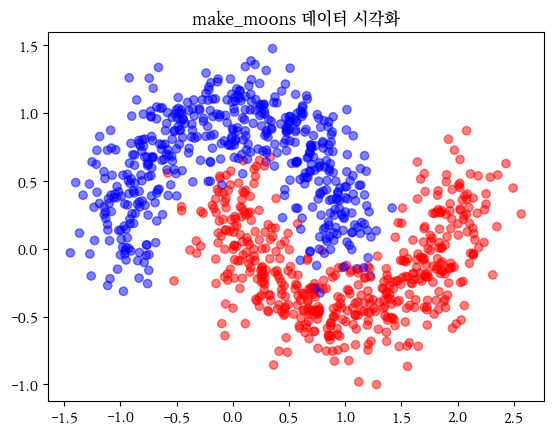

In [3]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", alpha=0.5)
plt.title("make_moons 데이터 시각화")
plt.show()

## 2. 학습 함수 정의

In [4]:
def train_logistic(X, y, epochs=50, lr=0.1, batch_size=None):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(X.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    history = model.fit(X, y,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0,
                        validation_split=0.2)
    return history, model

## 3. Batch GD 학습 (전체 데이터 사용)

In [5]:
history_batch, model_batch = train_logistic(
    X_train, y_train, epochs=100, lr=0.1, batch_size=len(X_train)
)

## 4. Stochastic GD 학습 (batch_size=1)

In [6]:
history_sgd, model_sgd = train_logistic(
    X_train, y_train, epochs=100, lr=0.1, batch_size=1
)

## 5. Mini-batch GD 학습 (batch_size=32)

In [7]:
history_mini, model_mini = train_logistic(
    X_train, y_train, epochs=100, lr=0.1, batch_size=32
)

## 6. Loss 비교 시각화

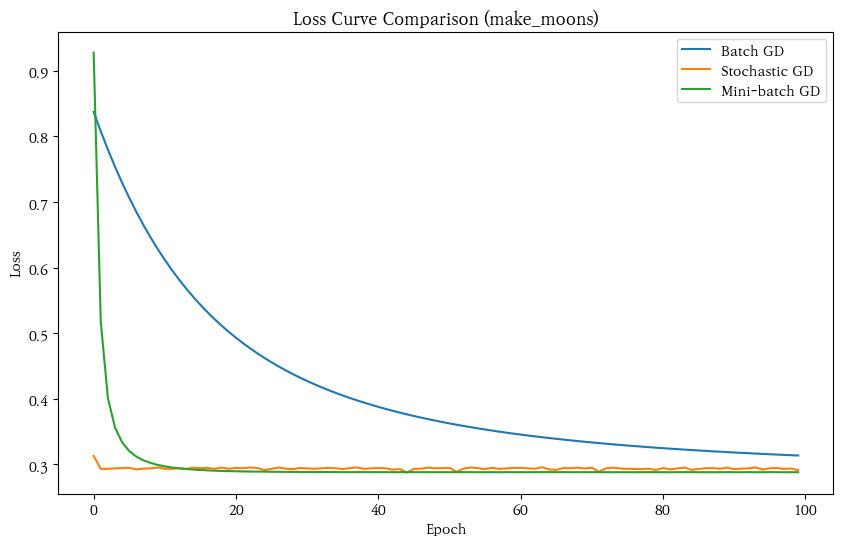

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(history_batch.history["loss"], label="Batch GD")
plt.plot(history_sgd.history["loss"], label="Stochastic GD")
plt.plot(history_mini.history["loss"], label="Mini-batch GD")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve Comparison (make_moons)")
plt.show()

## 7. 최종 정확도 비교

In [9]:
print("Batch GD 정확도:", model_batch.evaluate(X_test, y_test, verbose=0)[1])
print("Stochastic GD 정확도:", model_sgd.evaluate(X_test, y_test, verbose=0)[1])
print("Mini-batch GD 정확도:", model_mini.evaluate(X_test, y_test, verbose=0)[1])

Batch GD 정확도: 0.8550000190734863
Stochastic GD 정확도: 0.8650000095367432
Mini-batch GD 정확도: 0.8500000238418579


## 생각해보기
- 각 GD 방식의 장단점은 무엇일까요?

BGD는 빠른수렴 가능하나 loss최저점을 넘어갈 수 있음, SGD는 loss가 0에 가깝지만 느리고 진동이심함, miniBGD는 loss가 최저점에 달하지는 않으나 학습속도가 빠름